In [71]:
import numpy as np
import pandas as pd

# Import the Data

The dataset consists of immigrant data from Harvard's API with two target variables, 'selected', and 'rating'.

This allows for 2 possible conjoint methods to be used:
 - Choice-based conjoint analysis ('selected')
 - Rating-based conjoint analysis ('rating')

In [72]:
df = pd.read_csv('data/tv_data.csv').drop('Unnamed: 0',axis=1)
df.head()

,Rank,TV_size,TV_screen,TV_color
0,2,"32"" (81cm)",Plasma,Silver
1,3,"32"" (81cm)",Plasma,Black
2,1,"32"" (81cm)",Plasma,Anthrazit
3,5,"32"" (81cm)",LCD,Silver
4,6,"32"" (81cm)",LCD,Black


In [74]:
X = df[['TV_size', 'TV_screen', 'TV_color']]
y = df.Rank


In [78]:
X_dummied = pd.get_dummies(X)

X_dummied.head()

,"TV_size_32"" (81cm)","TV_size_37"" (94cm)","TV_size_42"" (107cm)",TV_screen_LCD,TV_screen_Plasma,TV_color_Anthrazit,TV_color_Black,TV_color_Silver
0,1,0,0,0,1,0,0,1
1,1,0,0,0,1,0,1,0
2,1,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,1
4,1,0,0,1,0,0,1,0


# Choice-Based Conjoint analysis

__Utility of an alternative U(x)__ is

\begin{align*}
  U(x) &= \sum_{i=1}^{m}\sum_{j=1}^{k_i} u_{ij}x_{ij} \\
\end{align*}

where:

uij: part-worth contribution (utility of jth level of ith attribute)

ki: number of levels for attribute i

m: number of attributes


In [77]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
res = sm.OLS(y, X_dummied).fit()
res.summary()

/Users/kylecaron/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.157e+30
Date:                Wed, 22 May 2019   Prob (F-statistic):          2.79e-179
Time:                        17:27:05   Log-Likelihood:                 565.56
No. Observations:                  18   AIC:                            -1119.
Df Residuals:                      12   BIC:                            -1114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
TV_size_32" (81cm)     -3.2857   2.28e-15  -1.44e+15      0.000      -3.286      -3.286
TV_size_37" (94cm)      2.7143   2.28e-15   1.19e+15      0.000       2.714       2.714
TV_size_42" (107cm)     8.7143   2.28e-15   3.82e+15      0.000       8.714       8.714
TV_screen_LCD           5.5714   1.72e-15   3.24e+15      0.000       5.571       5.571
TV_screen_Plasma        2.5714   1.72e-15    1.5e+15      0.000       2.571       2.571
TV_color_Anthrazit      1.7143   2.28e-15   7.52e+14      0.000       1.714       1.714
TV_color_Black          3.7143   2.28e-15   1.63e+15      0.000       3.714       3.714
TV_color_Silver         2.7143   2.28e-15   1.19e+15      0.000       2.714       2.714
==============================================================================
Omnibus:                        1.917   Durbin-Watson:                   0.464
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                1.053
Skew:                          -0.197   Prob(JB):                        0.591
Kurtosis:                       1.883   Cond. No.                     6.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
def get_cat(row):
    stop_idx = row.find('_',5)
    return row[:stop_idx]

In [108]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})

df_res['abs_param_w'] = np.abs(df_res['param_w'])
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

#create category
df_res['cat'] = df_res.param_name.apply(get_cat)


In [116]:
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,c,cat
TV_color_Anthrazit,TV_color_Anthrazit,1.714286,2.058433e-173,1.714286,True,blue,TV_color
TV_screen_Plasma,TV_screen_Plasma,2.571429,5.363010e-177,2.571429,True,blue,TV_screen
"TV_size_37"" (94cm)","TV_size_37"" (94cm)",2.714286,8.292176e-176,2.714286,True,blue,TV_size
TV_color_Silver,TV_color_Silver,2.714286,8.292176e-176,2.714286,True,blue,TV_color
"TV_size_32"" (81cm)","TV_size_32"" (81cm)",-3.285714,8.374863e-177,3.285714,True,blue,TV_size
TV_color_Black,TV_color_Black,3.714286,1.923231e-177,3.714286,True,blue,TV_color
TV_screen_LCD,TV_screen_LCD,5.571429,5.010757e-181,5.571429,True,blue,TV_screen
"TV_size_42"" (107cm)","TV_size_42"" (107cm)",8.714286,6.914388e-182,8.714286,True,blue,TV_size


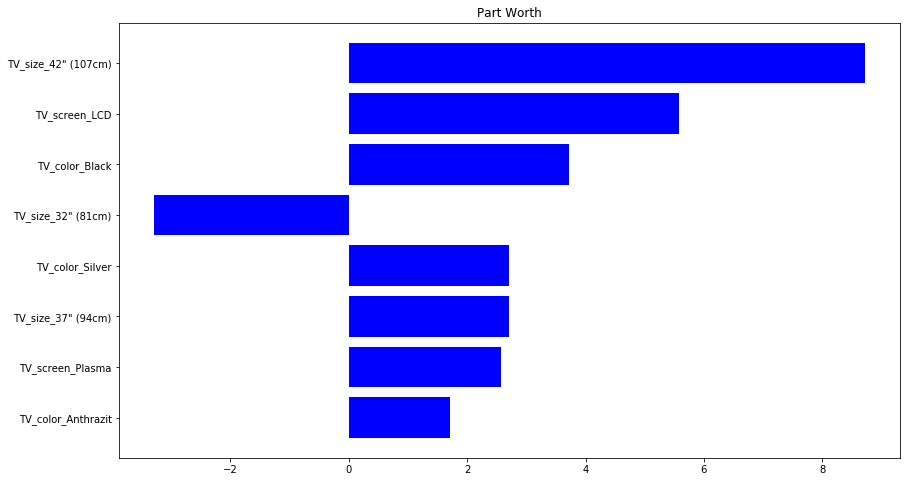

In [83]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [92]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]+'_'+sk[1]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [93]:
range_per_feature

{'TV_size': [-3.285714285714286, 2.7142857142857095, 8.714285714285719],
 'TV_screen': [5.571428571428572, 2.571428571428572],
 'TV_color': [1.7142857142857166, 3.714285714285718, 2.7142857142857144]}

In [95]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


In [94]:
importance_per_feature

{'TV_size': 12.000000000000004,
 'TV_screen': 3.0000000000000018,
 'TV_color': 1.9999999999999944}

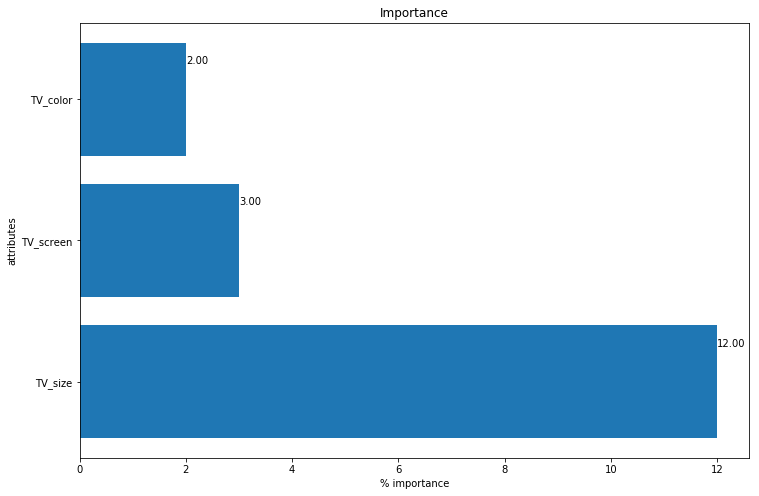

In [96]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

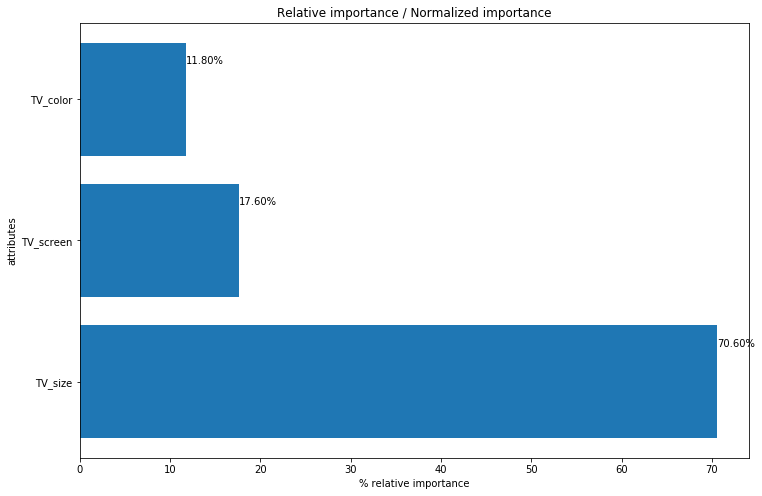

In [97]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

In [145]:
df_res.reset_index().groupby(['cat'])['param_w']

,index,param_name,param_w,pval,abs_param_w,is_sig_95,c,cat
0,TV_color_Anthrazit,TV_color_Anthrazit,1.714286,2.058433e-173,1.714286,True,blue,TV_color
1,TV_screen_Plasma,TV_screen_Plasma,2.571429,5.363010e-177,2.571429,True,blue,TV_screen
2,"TV_size_37"" (94cm)","TV_size_37"" (94cm)",2.714286,8.292176e-176,2.714286,True,blue,TV_size
3,TV_color_Silver,TV_color_Silver,2.714286,8.292176e-176,2.714286,True,blue,TV_color
4,"TV_size_32"" (81cm)","TV_size_32"" (81cm)",-3.285714,8.374863e-177,3.285714,True,blue,TV_size
5,TV_color_Black,TV_color_Black,3.714286,1.923231e-177,3.714286,True,blue,TV_color
6,TV_screen_LCD,TV_screen_LCD,5.571429,5.010757e-181,5.571429,True,blue,TV_screen
7,"TV_size_42"" (107cm)","TV_size_42"" (107cm)",8.714286,6.914388e-182,8.714286,True,blue,TV_size


In [144]:
df_res.loc[df_res.reset_index().groupby(['cat'])['param_w'].idxmax()]


KeyError: "None of [Int64Index([5, 6, 7], dtype='int64')] are in the [index]"

In [138]:
df_res.groupby('cat')['param_w'].max()

cat
TV_color     3.714286
TV_screen    5.571429
TV_size      8.714286
Name: param_w, dtype: float64

In [124]:
df_res.groupby('cat').sum()

,param_w,pval,abs_param_w,is_sig_95
cat,,,,
TV_color,8.142857,2.066918e-173,8.142857,3.0
TV_screen,8.142857,5.363511e-177,8.142857,2.0
TV_size,8.142857,9.129669e-176,14.714286,3.0
